## Phylogenetic Salmonella enterica subsp. enterica 

In [1]:
from Bio import Phylo
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
tree = Phylo.read("/salmonella-pangenome-SP/03-results/03.2-iqtree/03.2.1.newick_tree/salmonella_core.treefile", "newick")

In [3]:
# Adjusting the distance of the clades

for clade in tree.find_clades():
    if clade.branch_length is not None:
        clade.branch_length = math.sqrt(clade.branch_length)

tree.ladderize()


In [4]:
metadata = pd.DataFrame({
    "Sample": [
        "Alberta_EC20090641_SRR1183981",
        "Alberta_EC20090698_SRR1183982",
        "Alberta_EC20111514_GCF_000624295",
        "Alberta_EC20111515_GCF_000624315",
        "Alberta_EC20120677_GCF_000625755",
        "British_Columbia_EC20111510_GCF_000626555",
        "British_Columbia_EC20111554_GCF_000624335",
        "British_Columbia_EC20120685_GCF_000625535",
        "British_Columbia_EC20120686_GCF_000625555",
        "British_Columbia_EC20120765_GCF_000624995",
        "Nova_Scotia_EC20120590_GCF_000625495",
        "Ontario_EC20090135_SRR1183989",
        "Ontario_EC20090193_SRR1183988",
        "Ontario_EC20090332_SRR1183990",
        "Ontario_EC20100130_SRR1183993",
        "Ontario_EC20120916_GCF_000624155",
        "Quebec_N13-01311_SRR5239213",
        "Quebec_N13-01312_SRR5239201",
        "Quebec_N13-01323_SRR5241839",
        "Quebec_N13-01330_SRR5241836",
        "Quebec_N13-01348_SRR5241832",
        "New_Brunswick_N13-02934_SRR5241846",
        "New_Brunswick_N13-02944_SRR5241820",
        "New_Brunswick_N13-02946_SRR5241852"
    ],
    "Province": [
        "Alberta","Alberta","Alberta","Alberta","Alberta",
        "British_Columbia","British_Columbia","British_Columbia",
        "British_Columbia","British_Columbia",
        "Nova_Scotia",
        "Ontario","Ontario","Ontario","Ontario","Ontario",
        "Quebec","Quebec","Quebec","Quebec","Quebec",
        "New_Brunswick","New_Brunswick","New_Brunswick"
    ],
    
    "ST": [
    "Enteritidis","Enteritidis","Enteritidis","Enteritidis","Enteritidis",
    "Enteritidis","Enteritidis","Enteritidis","Enteritidis","Enteritidis",
    "Enteritidis",
    "Enteritidis","Enteritidis","Enteritidis","Enteritidis","Enteritidis",
    "Heidelberg","Heidelberg","Heidelberg","Heidelberg","Heidelberg",
    "Heidelberg","Heidelberg","Heidelberg"
]

})

meta_dict = metadata.set_index("Sample").to_dict(orient="index")



In [10]:
colors_ST = {
    "Enteritidis": "#E41A1C",
    "Heidelberg": "#44ff00",
    None: "gray50"
}

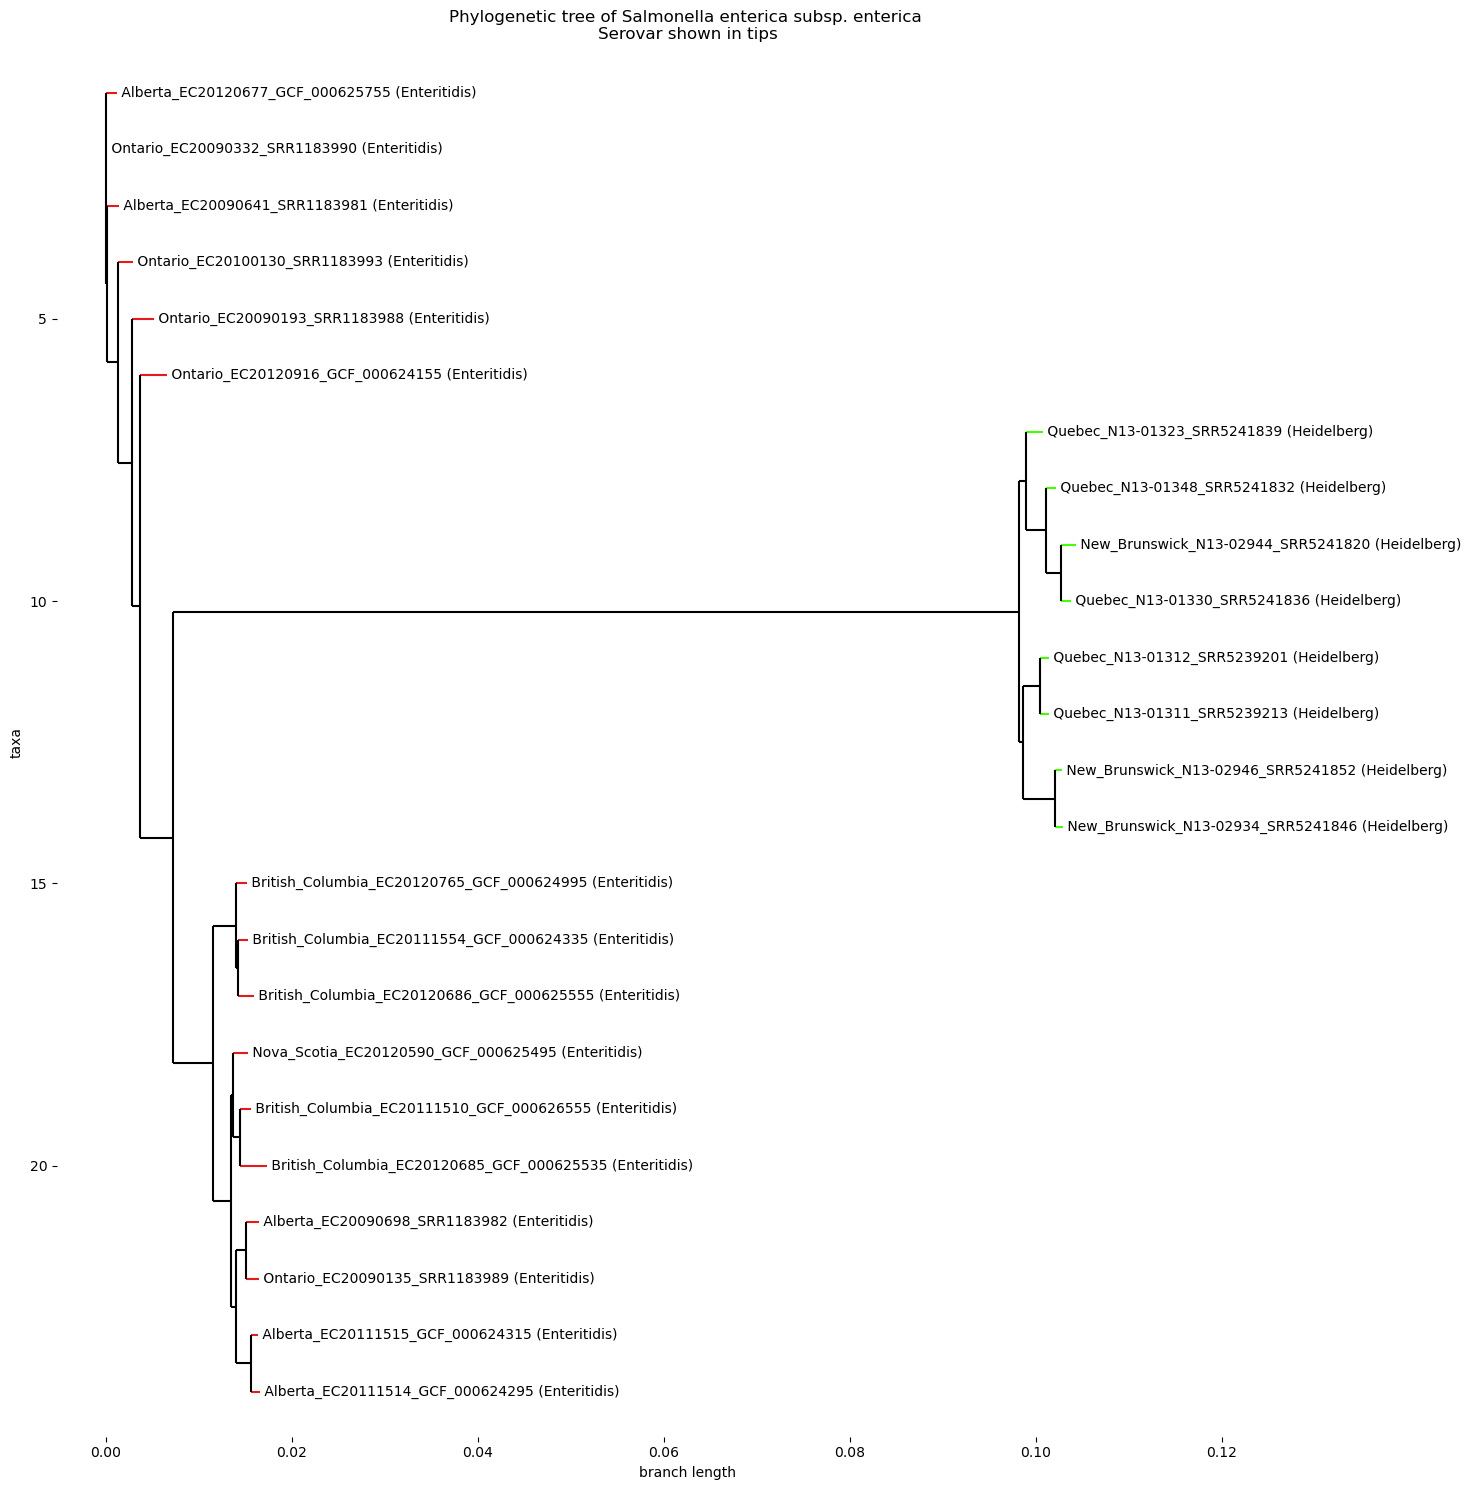

In [12]:
# Assigns a color to the terminal branch per serovar
for clade in tree.get_terminals():
    info = meta_dict.get(clade.name, {})
    st = info.get("ST", None)
    clade.color = colors_ST.get(st, "gray")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)

Phylo.draw(
    tree,
    axes=ax,
    do_show=False,
    label_func=tip_label
)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Phylogenetic tree of Salmonella enterica subsp. enterica \nSerovar shown in tips")
plt.tight_layout()

out_dir = "/salmonella-pangenome-SP/03-results/03.2-iqtree/03.2.3.figures"
out_file = f"{out_dir}/python_salmonella_enterica_tree_figure.jpg"

plt.savefig(
    out_file,
    dpi=300,
    bbox_inches="tight"
)

plt.show()




## Phylogenetic Salmonella enterica subsp. enterica serovar enteritidis 

In [13]:
tree_enteritidis = Phylo.read("/home/mliva/salmonella-pangenome-SP/03-results/03.2-iqtree/03.2.1.newick_tree/salmonella_serovar_enteritidis.treefile", "newick")

In [16]:
tree_enteritidis.ladderize()

In [17]:
colors_province = {
    "Alberta": "#AAF10E",
    "British_Columbia": "#F10E38",
    "Nova_Scotia": "#F6E609",
    "Ontario": "#550EF1", 
    "Quebec": "#F7083E", 
    "New_Brunswick": "#08F7C1", 
    None: "gray50"
}

In [21]:
def tip_label(clade):
    if clade.is_terminal():
        return clade.name
    return ""


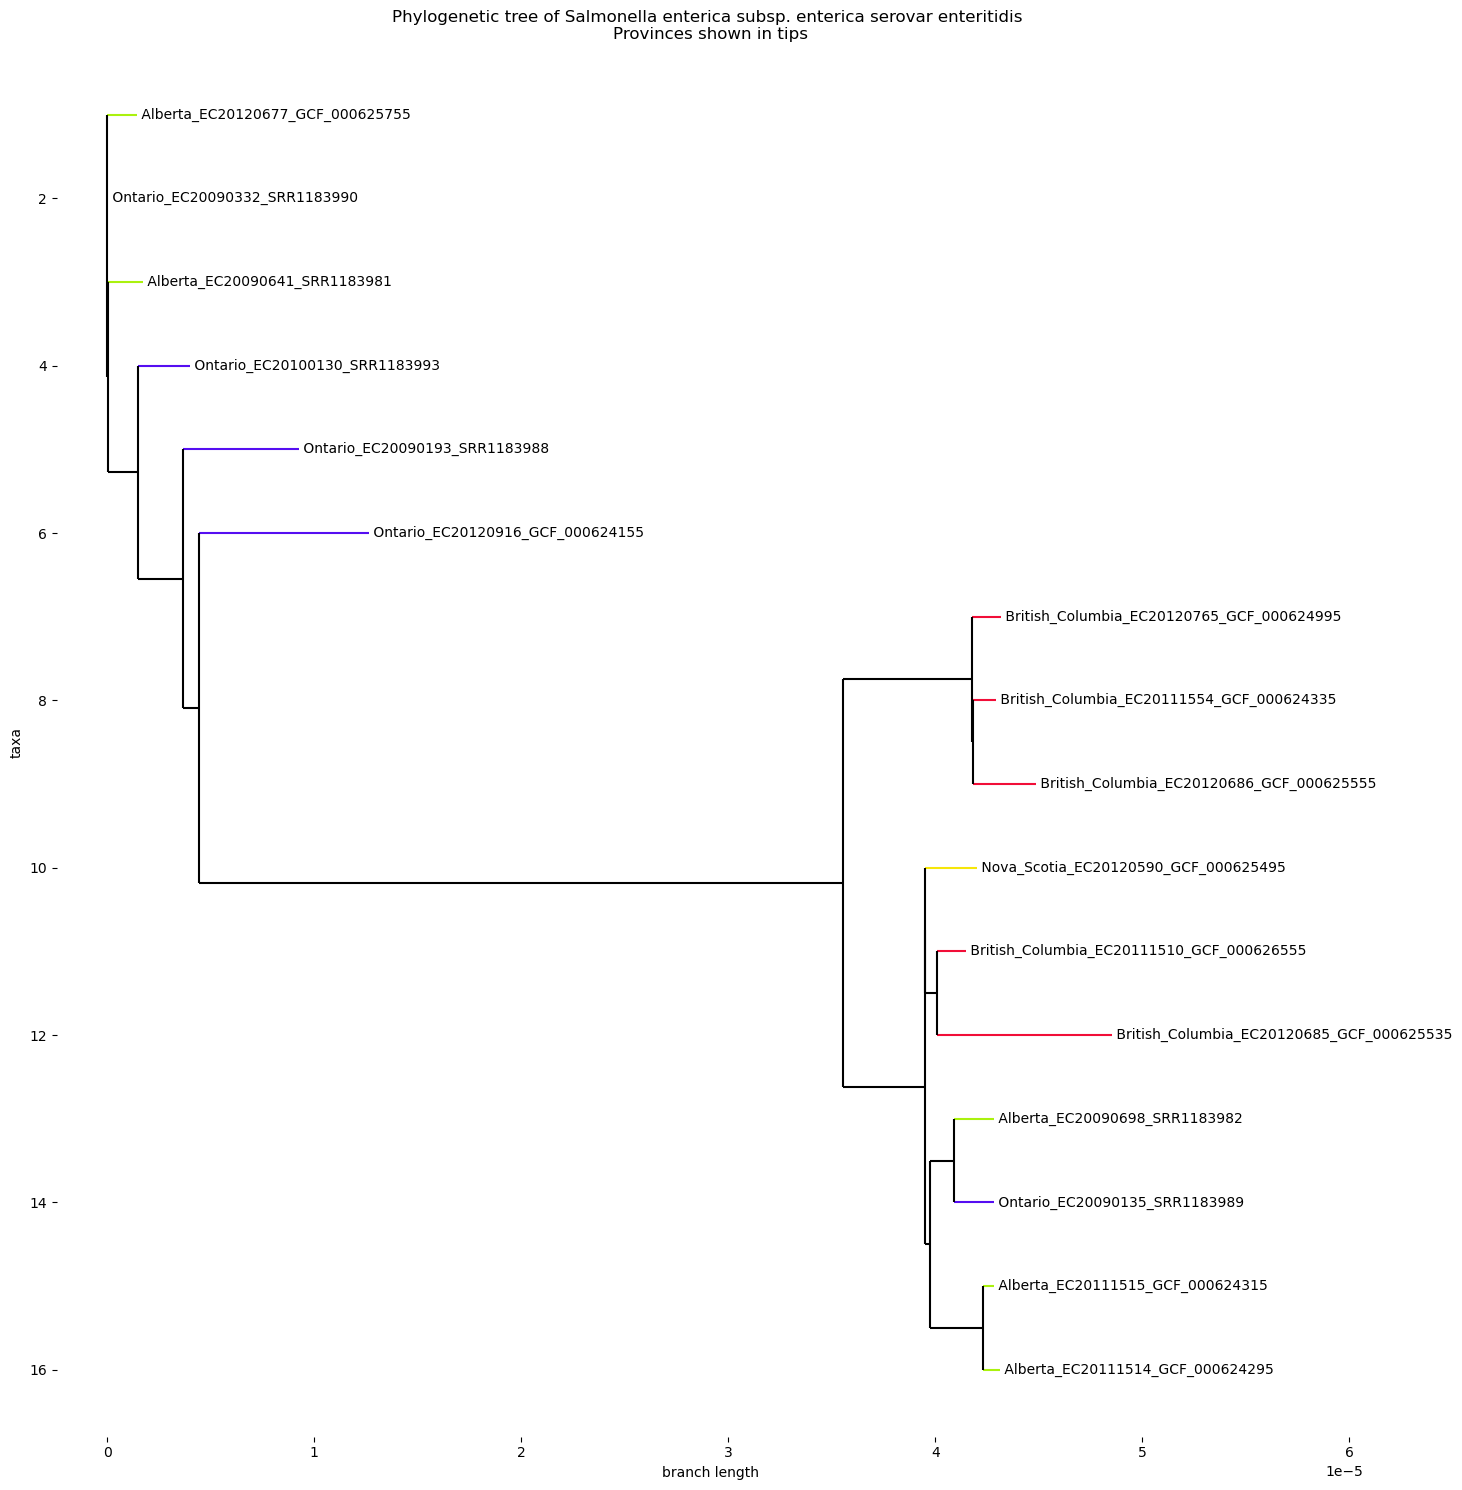

In [23]:
# Assigns a color to the terminal branch per province
for clade in tree_enteritidis.get_terminals():
    info = meta_dict.get(clade.name, {})
    province = info.get("Province", None)
    clade.color = colors_province.get(province, "gray")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)

Phylo.draw(
    tree_enteritidis,
    axes=ax,
    do_show=False,
    label_func=tip_label
)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Phylogenetic tree of Salmonella enterica subsp. enterica serovar enteritidis \nProvinces shown in tips")
plt.tight_layout()

out_dir = "/home/mliva/salmonella-pangenome-SP/03-results/03.2-iqtree/03.2.3.figures"
out_file = f"{out_dir}/python_salmonella_enterica_enteritidis_tree_figure.jpg"

plt.savefig(
    out_file,
    dpi=300,
    bbox_inches="tight"
)

plt.show()

## Phylogenetic Salmonella enterica subsp. enterica serovar Heidelberg 

In [25]:
tree_heidelberg = Phylo.read("/home/mliva/salmonella-pangenome-SP/03-results/03.2-iqtree/03.2.1.newick_tree/salmonella_serovar_Heidelberg.treefile", "newick")

In [26]:
tree_heidelberg.ladderize()

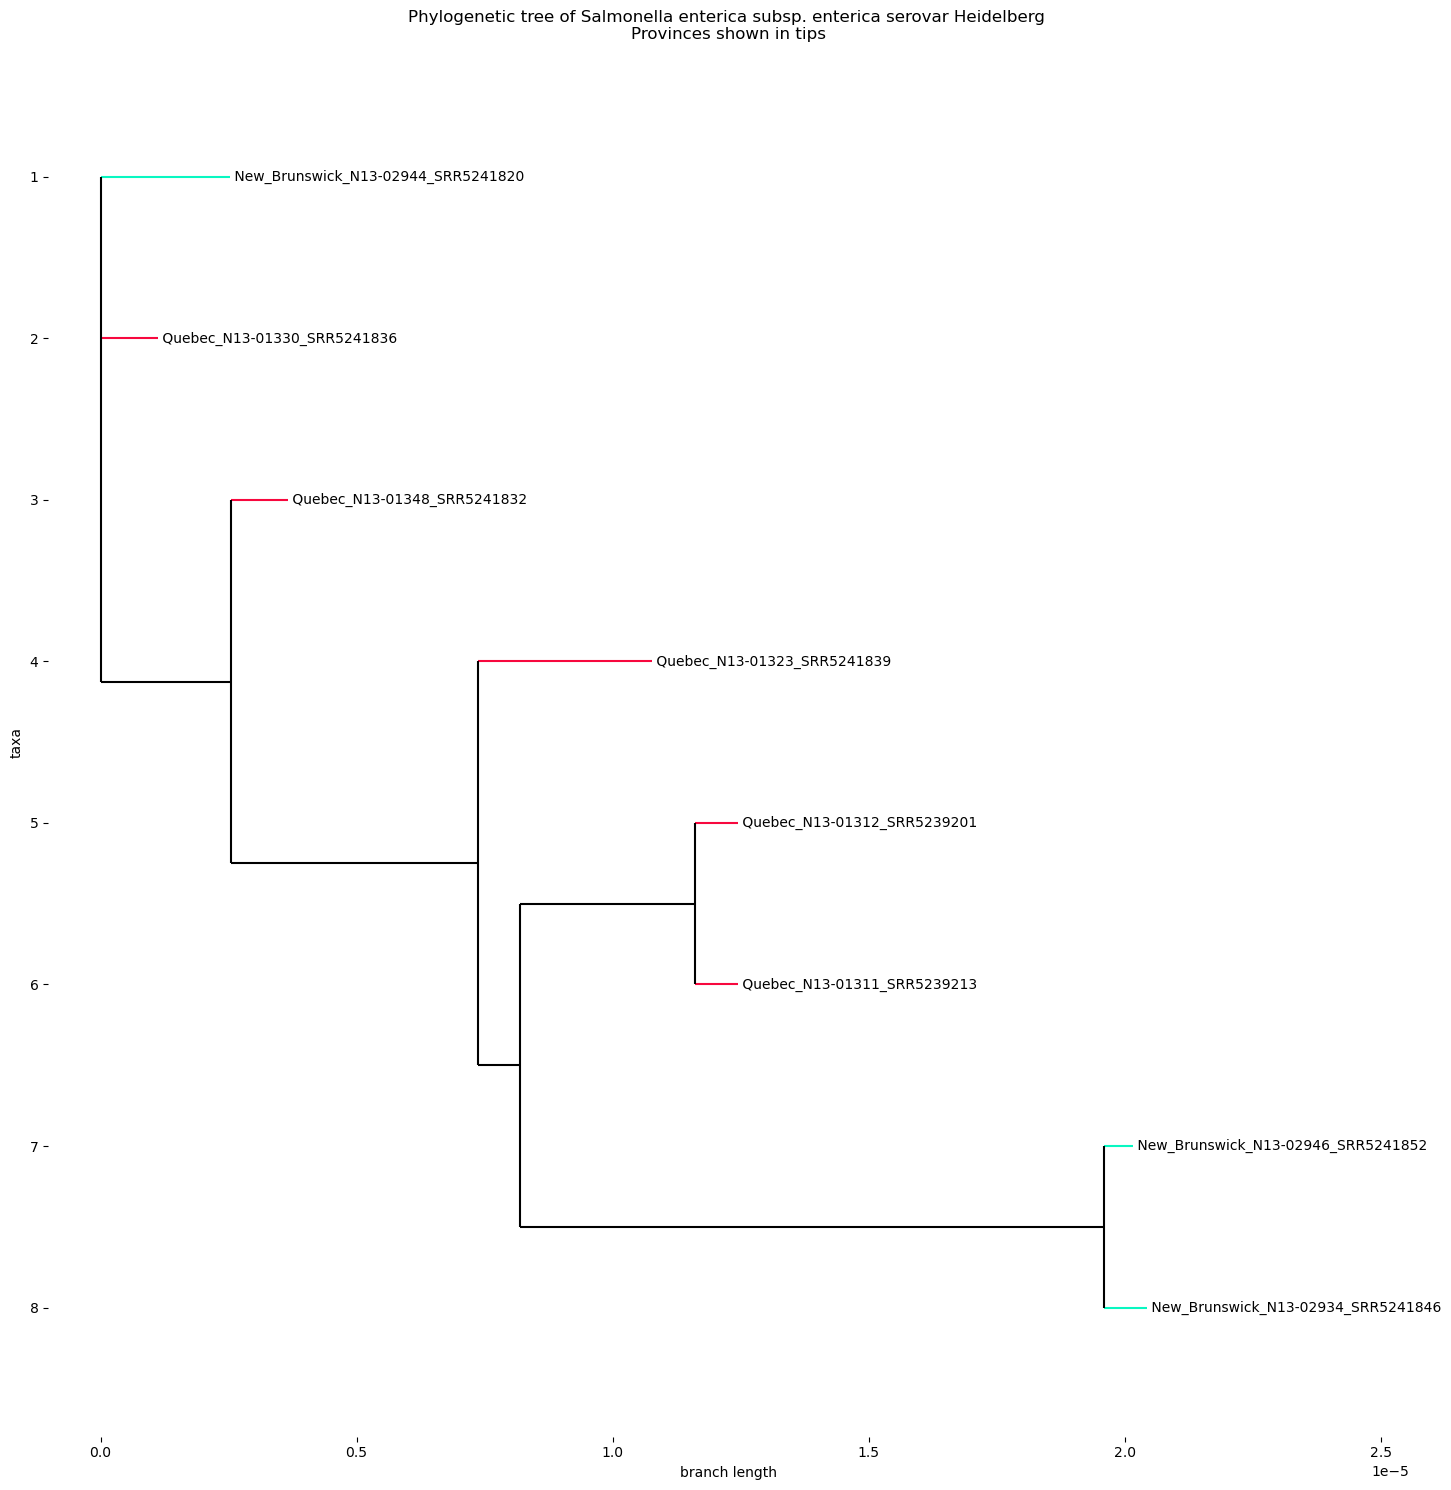

In [28]:
# Assigns a color to the terminal branch per province
for clade in tree_heidelberg.get_terminals():
    info = meta_dict.get(clade.name, {})
    province = info.get("Province", None)
    clade.color = colors_province.get(province, "gray")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)

Phylo.draw(
    tree_heidelberg,
    axes=ax,
    do_show=False,
    label_func=tip_label
)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Phylogenetic tree of Salmonella enterica subsp. enterica serovar Heidelberg \nProvinces shown in tips")
plt.tight_layout()

out_dir = "/home/mliva/salmonella-pangenome-SP/03-results/03.2-iqtree/03.2.3.figures"
out_file = f"{out_dir}/python_salmonella_enterica_Heidelberg_tree_figure.jpg"

plt.savefig(
    out_file,
    dpi=300,
    bbox_inches="tight"
)

plt.show()